In [29]:
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
%matplotlib inline

In [2]:
wine = load_wine()

In [3]:
x=wine.data

In [4]:
y=wine.target

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
deci_tree = DecisionTreeClassifier()
knn_class = KNeighborsClassifier(n_jobs=-1)

In [25]:
deci_tree.fit(x_train,y_train)
knn_class.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
predictions = deci_tree.predict(x_test)
k_pred = knn_class.predict(x_test)

In [27]:
print("Accuracy on the Test Data ")
print(accuracy_score(y_test, predictions))
print(accuracy_score(y_test, k_pred))

Accuracy on the Test Data 
0.944444444444
0.962962962963


In [30]:
confusion_matrix(y_test,k_pred)

array([[19,  0,  0],
       [ 1, 19,  1],
       [ 0,  0, 14]])

In [36]:
precision_score(y_test,k_pred,average='micro')

0.96296296296296291

## STANDARDIZE DATASET

In [11]:
standard_scaler = skl.preprocessing.StandardScaler()

In [12]:
x_new = standard_scaler.fit_transform(x)

In [13]:
tsne = TSNE(n_components=2, random_state=0)

In [14]:
x_test_2d = tsne.fit_transform(x_new)

In [16]:
markers = ('s','d','o','^','v')

In [17]:
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan'}

In [18]:
plt.figure()

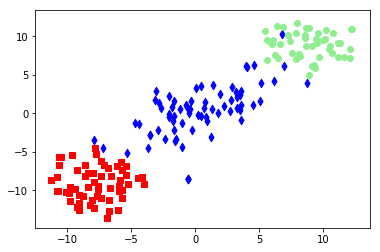

In [19]:
for idx, cl in enumerate(np.unique(y)):
    #print(idx,cl)
    plt.scatter(x=x_test_2d[y==cl,0],y=x_test_2d[y==cl,1],c=color_map[idx],marker=markers[idx],label=cl)

In [20]:
x_test_2d[10]

array([ -7.34563494, -11.02926159], dtype=float32)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)

In [22]:
deci_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
predictions = deci_tree.predict(x_test)

In [24]:
print("Accuracy on the Standardize Test Data ")
print(accuracy_score(y_test, predictions))

Accuracy on the Standardize Test Data 
0.944444444444
